<a href="https://colab.research.google.com/github/AnnieCRY/DS5230-project/blob/master/data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### original data available [here](https://www.kaggle.com/chrisfilo/to-bee-or-no-to-bee/data), and downloaded into google drive already

### if you haven't download the data, please download first and save in your google drive under folder named 5230Project

In [ ]:
# test

In [17]:
# load data from google drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# move zip file to colab vm
! cp gdrive/My\ Drive/5230Project/501224_928375_bundle_archive.zip ./

In [19]:
%%capture
# unzip the file
! unzip 501224_928375_bundle_archive.zip

! mkdir labFiles
! mkdir audioFiles
! mv *.mp3 audioFiles/
! mv *.wav audioFiles/
! mv *.lab labFiles/

In [22]:
# download the supporting files from github
! rm -rf Audio_based_identification_beehive_states/
! git clone https://github.com/Tonyz4516/Audio_based_identification_beehive_states.git

Cloning into 'Audio_based_identification_beehive_states'...
remote: Enumerating objects: 114, done.
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114
Receiving objects: 100% (114/114), 56.94 KiB | 435.00 KiB/s, done.
Resolving deltas: 100% (56/56), done.


In [23]:
! mv Audio_based_identification_beehive_states/Bee_NotBee_classification/* ./

In [7]:
%%capture
! pip install muda

In [8]:
import os
from info import i, printb, printr, printp, print
from utils import load_audioFiles_saves_segments, write_Statelabels_from_beeNotBeelabels, get_uniqueHives_names_from_File, split_samples_byHive, get_samples_id_perSet, get_features_from_samples, get_GT_labels_fromFiles, labels2binary, write_sample_ids_perHive, split_samples_ramdom

In [9]:
block_size=60 # blocks of 60 seconds
thresholds=[0, 5]  # minimum length for nobee intervals: 0 or 5 seconds (creates one label file per threshold value)
path_audioFiles="audioFiles/"  # path to audio files
annotations_path="labFiles/" # path to .lab files
path_save_audio_labels='dataset_BeeNoBee_'+str(block_size)+'sec/'  # path where to save audio segments and labels files.

In [10]:
if not os.path.exists(path_save_audio_labels):
    os.makedirs(path_save_audio_labels)

In [24]:
# segments audio files, assigns label BeeNotBee to each block, writes labels to csv , saves segmened blocks in wav.
# independently of flag save_audioSegments, if .wav with same name already exists it won't save again.
# new labels are just appended to existing labels file, if purpose is to redo the whole file delete before running.
load_audioFiles_saves_segments( list(os.listdir("audioFiles")), path_audioFiles, path_save_audio_labels, block_size , thresholds, annotations_path, read_beeNotBee_annotations='yes', save_audioSegments='yes')

[2020-07-18 05:25:06 RAM8.2% 0.26GB] Number of audiofiles in folder: 56
[2020-07-18 05:25:06 RAM8.2% 0.26GB] 

[2020-07-18 05:25:06 RAM8.2% 0.26GB] Processing Hive1_12_06_2018_QueenBee_H1_audio___16_40_00.wav          :::file number:  1 --------->of 56
[2020-07-18 05:25:10 RAM8.3% 0.31GB] -----------------Reading segment 0
[2020-07-18 05:25:10 RAM8.3% 0.31GB] Hive1_12_06_2018_QueenBee_H1_audio___16_40_00__segment0
[2020-07-18 05:25:10 RAM8.3% 0.31GB] ---------------------Will read BeeNotbee anotations and create labels for segment0
[2020-07-18 05:25:10 RAM8.3% 0.31GB] labFiles//Hive1_12_06_2018_QueenBee_H1_audio___16_40_00.lab
[2020-07-18 05:25:10 RAM8.3% 0.31GB] -----------------Wrote label for th 0 seconds of segment0
[2020-07-18 05:25:10 RAM8.3% 0.31GB] labFiles//Hive1_12_06_2018_QueenBee_H1_audio___16_40_00.lab
[2020-07-18 05:25:10 RAM8.3% 0.31GB] -----------------Wrote label for th 5 seconds of segment0
[2020-07-18 05:25:10 RAM8.3% 0.31GB] -----------------Saved wav file for segme

In [33]:
path_beeNotbee_labels=path_save_audio_labels + 'labels_BeeNotBee_th' + str(thresholds[0])+'.csv' 
# reads labels beeNotBee files and creates corresponding states label file.
write_Statelabels_from_beeNotBeelabels(path_save_audio_labels, path_beeNotbee_labels, states=['active','missing queen','swarm' ])

In [25]:
import utils
sample_ids = utils.get_list_samples_names(path_save_audio_labels) # get sample ids from audio segments folder.

In [26]:
# split data by Hive 
hives=write_sample_ids_perHive(sample_ids , path_save_audio_labels)  # retrieves unique hives names and also writes these to a file
#hives=get_uniqueHives_names_from_File(path_save_audio_labels)
for i in range(3):
    split_dict = split_samples_byHive(0.1, 0.5, hives, path_save_audio_labels+'split_byHive_'+str(i))

[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for testing: ['CF003']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for training: ['CF001', 'CJ001', 'Hive3']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for validation: ['GH001', 'Hive1']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for testing: ['CJ001']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for training: ['CF001', 'CF003', 'Hive1']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for validation: ['GH001', 'Hive3']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for testing: ['CJ001']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for training: ['CF003', 'GH001', 'Hive1']
[2020-07-18 05:57:22 RAM8.4% 0.32GB] hives for validation: ['Hive3', 'CF001']


In [27]:
#split data randomly
for i in range(3):
    split_dict = split_samples_ramdom(0.1,0.5,path_save_audio_labels, path_save_audio_labels+'split_random_'+str(i))

[2020-07-18 05:57:25 RAM8.4% 0.33GB] samples for testing: ['Hive1_12_06_2018_QueenBee_H1_audio___15_00_00__segment6.wav', 'Hive1_12_06_2018_QueenBee_H1_audio___15_30_00__segment5.wav', 'CF003 - Active - Day - (215)__segment3.wav', 'Hive1_31_05_2018_NO_QueenBee_H1_audio___15_10_00__segment6.wav', 'CF003 - Active - Day - (224)__segment4.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_20_00__segment1.wav', 'CJ001 - Missing Queen - Day -  (100)__segment3.wav', 'Hive1_12_06_2018_QueenBee_H1_audio___16_50_00__segment8.wav', 'Hive1_31_05_2018_NO_QueenBee_H1_audio___15_40_00__segment6.wav', 'CJ001 - Missing Queen - Day -  (100)__segment2.wav', 'Hive1_12_06_2018_QueenBee_H1_audio___15_00_00__segment1.wav', 'CJ001 - Missing Queen - Day -  (101)__segment1.wav', 'Hive3_15_07_2017_NO_QueenBee_H3_audio___06_40_00__segment6.wav', 'CF003 - Active - Day - (223)__segment0.wav', 'Hive3_12_07_2017_NO_QueenBee_H3_audio___16_30_00__segment9.wav', 'CF003 - Active - Day - (222)__segment2.wav', 'Hive1_12_06_


## looking into .lab files

In [41]:
with open('/content/labFiles/CF003 - Active - Day - (214).lab','r') as f:
    lines = f.read().split('\n')
    for i in lines:
      print(i)

[2020-07-18 06:37:05 RAM9.1% 0.52GB] CF003 - Active - Day - (214)
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 0	7.3	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 7.31	7.87	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 7.88	10.37	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 10.38	10.63	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 10.64	15.64	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 15.65	17.32	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 17.33	20.93	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 20.94	28.96	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 28.97	33.01	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 33.02	36.43	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 36.44	37.65	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 37.66	44.42	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 44.43	49.98	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 49.99	58.07	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 58.08	66.38	bee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 66.39	74.95	nobee
[2020-07-18 06:37:05 RAM9.1% 0.52GB] 74.96	77.5	bee
[2020-07-18 06:37:05 RAM9.1

## Sample 60sec audio

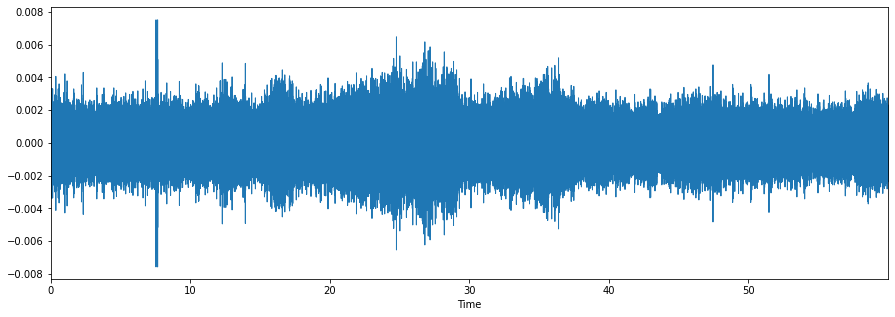

In [31]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd 
# Use one audio file in previous parts again
fname = '/content/dataset_BeeNoBee_60sec/CF003 - Active - Day - (214)__segment0.wav'
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Paly it again to refresh our memory
ipd.Audio(data, rate=sampling_rate)